# London Crime in 2008-2016

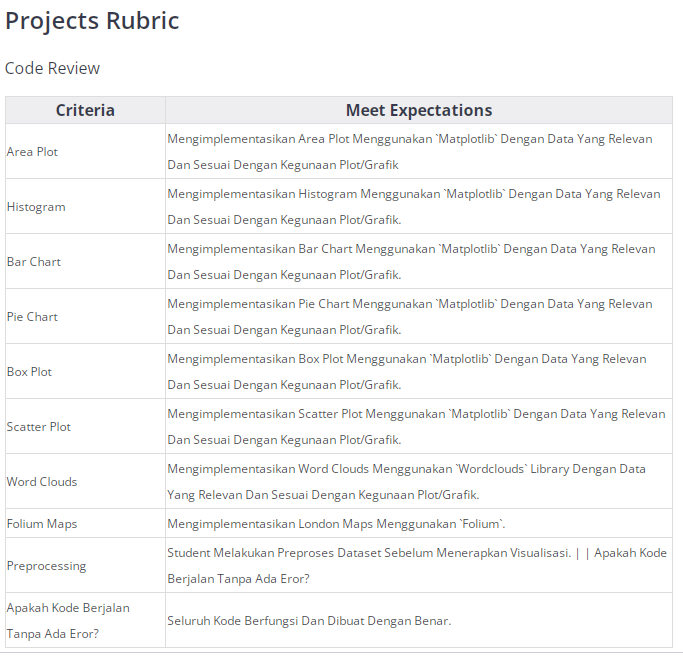

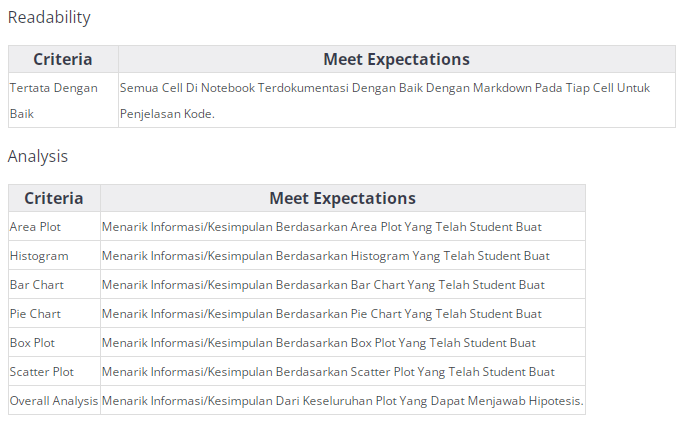

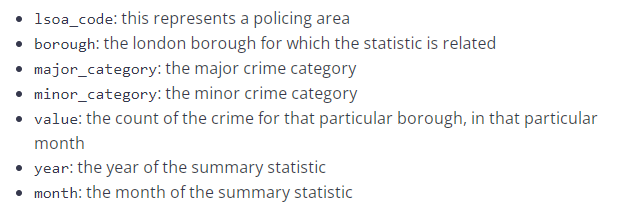

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import seaborn as sns
import folium
from folium import plugins
print('import library is complete')
mpl.style.use(['ggplot'])

import library is complete


In [2]:
London_Crime_Cek = pd.read_csv('london_crime_by_lsoa.csv')
London_Crime_Cek.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [3]:
noting_crime = 0

In [4]:
London_Crime = pd.read_csv('london_crime_by_lsoa.csv', na_values = noting_crime)
London_Crime.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,NaN,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,NaN,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,NaN,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,NaN,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,NaN,2008,6


In [5]:
London_Crime.dropna(inplace=True)
London_Crime.drop('lsoa_code',axis=1,inplace=True)
London_Crime.head()

,borough,major_category,minor_category,value,year,month
9,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1.0,2016,8
16,Barking and Dagenham,Theft and Handling,Other Theft Person,1.0,2009,5
24,Ealing,Theft and Handling,Other Theft Person,2.0,2012,1
25,Hackney,Violence Against the Person,Harassment,1.0,2013,2
32,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1.0,2016,4


In [6]:
years = list(map(str,range(2008,2017)))
years

['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']

In [7]:
LC_year = London_Crime.groupby('year')['value'].sum()
LC_year.index.name=None
LC_year

2008    738641.0
2009    717214.0
2010    715324.0
2011    724915.0
2012    737329.0
2013    686407.0
2014    680183.0
2015    711624.0
2016    736121.0
Name: value, dtype: float64

In [8]:
London_Crime['Coordinate'] = London_Crime['borough']

In [9]:
LC_borough = London_Crime.drop(['month','year'],axis=1).groupby('borough').sum()
LC_borough.sort_values('value',ascending=False,inplace=True)
LC_borough.head()

C:\Users\WINDOWS 10\AppData\Local\Temp\ipykernel_7284\2528339663.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  LC_borough = London_Crime.drop(['month','year'],axis=1).groupby('borough').sum()


,value
borough,
Westminster,455028.0
Lambeth,292178.0
Southwark,278809.0
Camden,275147.0
Newham,262024.0


## Line Plot

Bagaimana statistik kejahatan di London dari tahun 2008 - 2016?

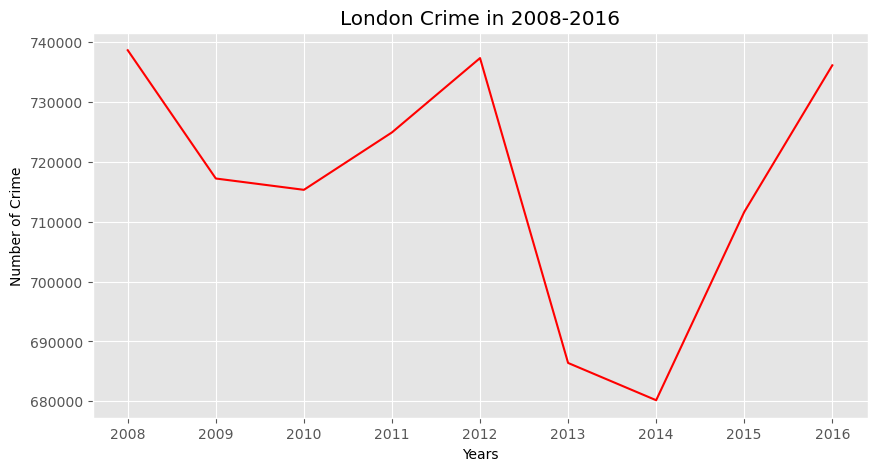

In [10]:

LC_year.plot(kind='line',color='red',figsize=(10,5))

plt.title('London Crime in 2008-2016')
plt.ylabel('Number of Crime')
plt.xlabel('Years')
plt.show()

Angka kejahatan di London dari tahun 2008-2016 menunjukkan bahwa tertinggi terjadi ditahun 2008 dab terendah pada tahun 2014. Setelah sempat turun ditahun 2009-2010 dan 2013-2014 angka kejahatan kembali naik di tahun 2011-2012 dan 2015-2016

## Area Plot

Bagaimana statistik kejahatan di 5 wilayah dengan tingkat kriminalitas tertinggi dari 2008-2016?

In [11]:
LC_B = London_Crime.set_index('borough').drop('month',axis=1)
LC_1 = LC_B.loc['Westminster'].groupby('year').sum()
LC_2 = LC_B.loc['Lambeth'].groupby('year').sum()
LC_3 = LC_B.loc['Southwark'].groupby('year').sum()
LC_4 = LC_B.loc['Camden'].groupby('year').sum()
LC_5 = LC_B.loc['Newham'].groupby('year').sum()

C:\Users\WINDOWS 10\AppData\Local\Temp\ipykernel_7284\3908429033.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  LC_1 = LC_B.loc['Westminster'].groupby('year').sum()
C:\Users\WINDOWS 10\AppData\Local\Temp\ipykernel_7284\3908429033.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  LC_2 = LC_B.loc['Lambeth'].groupby('year').sum()
C:\Users\WINDOWS 10\AppData\Local\Temp\ipykernel_7284\3908429033.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should 

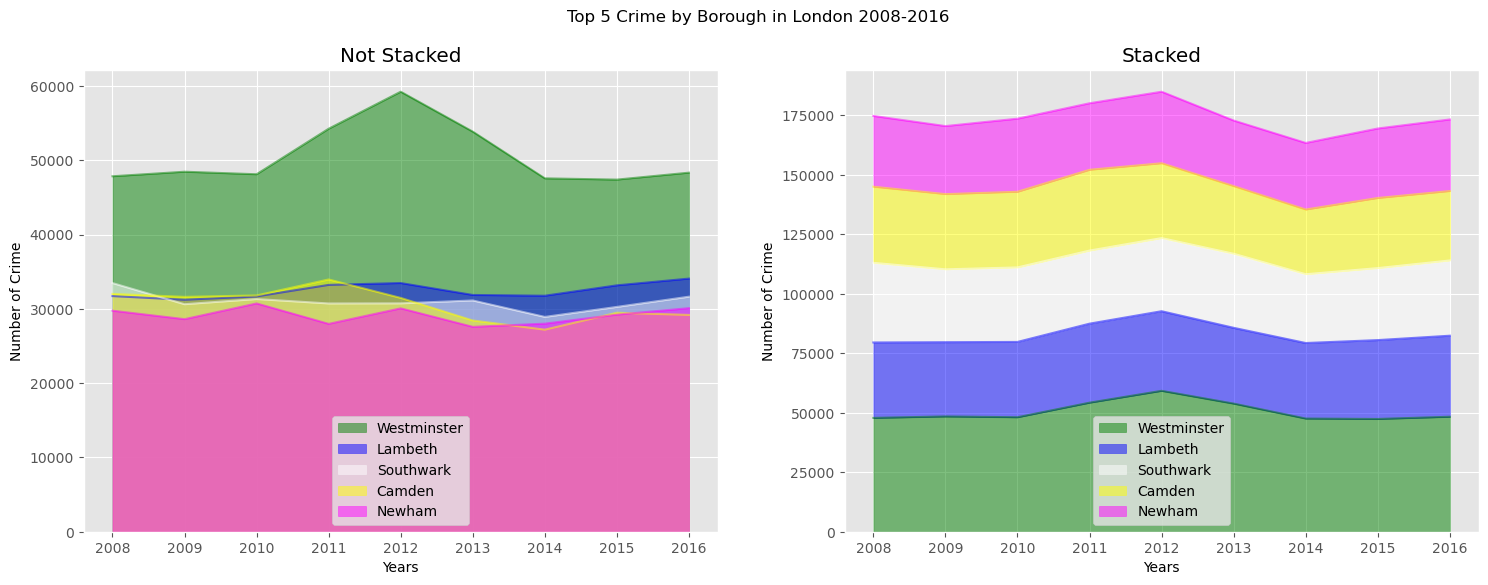

In [12]:
LC_top5 = pd.DataFrame({'Westminster':LC_1['value'],
                        'Lambeth':LC_2['value'],
                        'Southwark':LC_3['value'],
                        'Camden':LC_4['value'],
                        'Newham':LC_5['value'],
                       })


fig = plt.figure()
ax0 = fig.add_subplot(1,2,1) #tambah subplot 1 (1 row, 2 column, first plot)
ax1 = fig.add_subplot(1,2,2) #tambah subplot 2 (1 row , 2 columns, second plot)
LC_top5.plot(kind='area',
             alpha=0.5,
             stacked=False,
             figsize=(18,6),
             color=['green','blue','white','yellow','magenta'],
             ax=ax0
            )
ax0.legend(loc='lower center')
ax0.set_title('Not Stacked')
ax0.set_ylabel('Number of Crime')
ax0.set_xlabel('Years')

LC_top5.plot(kind='area',
             alpha=0.5,
             stacked=True,
             # figsize=(15,7),
             color=['green','blue','white','yellow','magenta'],
             ax=ax1,
            )
ax1.set_title('Stacked')
ax1.set_ylabel('Number of Crime')
ax1.set_xlabel('Years')
plt.suptitle('Top 5 Crime by Borough in London 2008-2016')

plt.show()

Dari Visualisasi Grafik diatas, Wilayah Westminster merupakan Wilayah dengan angka kejahatan tertinggi di London dari tahun 2008-2016. Dimana ditahun 2012 adalah angka kejahatan tertinggi dari seluruh Wilayah di London. Sedangkan di uruan 2-4 relatif sama dengan angka kejahat berkisar ~30000 pertahunnya 

##  Histogram

Wilayah Westminster merupakan wilayah dengan tingkat kejahatan tertinggi di London, bagaimanakah statistik kejahatan di westminster menurut major category atau kategori umumnya?

In [13]:
London_Crime[London_Crime['borough']=='Westminster'].groupby('major_category').sum().sort_values('value',ascending=False)

C:\Users\WINDOWS 10\AppData\Local\Temp\ipykernel_7284\3522745422.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  London_Crime[London_Crime['borough']=='Westminster'].groupby('major_category').sum().sort_values('value',ascending=False)


,value,year,month
major_category,,,
Theft and Handling,277617.0,80513360,263268
Violence Against the Person,71448.0,55101001,180718
Drugs,34031.0,15585218,50427
Burglary,29295.0,24868276,80590
Criminal Damage,20405.0,26407977,85440
Robbery,15752.0,12183419,39878
Other Notifiable Offences,6148.0,6513356,20987
Fraud or Forgery,273.0,224896,169
Sexual Offences,59.0,78312,56


In [14]:
W_major = London_Crime[London_Crime['borough']=='Westminster'].groupby(['major_category','year']).sum().drop('month',axis=1)
W_major.loc['Theft and Handling']['value']

C:\Users\WINDOWS 10\AppData\Local\Temp\ipykernel_7284\3226063160.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  W_major = London_Crime[London_Crime['borough']=='Westminster'].groupby(['major_category','year']).sum().drop('month',axis=1)


year
2008    29266.0
2009    29967.0
2010    29191.0
2011    33529.0
2012    38152.0
2013    33868.0
2014    28144.0
2015    27980.0
2016    27520.0
Name: value, dtype: float64

In [15]:
His_Wmajor = pd.DataFrame({'Theft and Handling':W_major.loc['Theft and Handling']['value'],
                           'Violence Against the Person':W_major.loc['Violence Against the Person']['value'],
                           'Drugs':W_major.loc['Drugs']['value'],
                           'Burglary':W_major.loc['Burglary']['value'],
                           'Criminal Damage':W_major.loc['Criminal Damage']['value'],
                          })
His_Wmajor.index.name=None
His_Wmajor

,Theft and Handling,Violence Against the Person,Drugs,Burglary,Criminal Damage
2008,29266.0,6697.0,4075.0,2962.0,2599.0
2009,29967.0,7053.0,3894.0,2957.0,2564.0
2010,29191.0,7127.0,4632.0,2682.0,2385.0
2011,33529.0,7432.0,5670.0,2900.0,2246.0
2012,38152.0,7130.0,4654.0,4083.0,2254.0
2013,33868.0,6887.0,4151.0,3906.0,2080.0
2014,28144.0,8432.0,2804.0,3435.0,2016.0
2015,27980.0,9856.0,2102.0,3152.0,2082.0
2016,27520.0,10834.0,2049.0,3218.0,2179.0


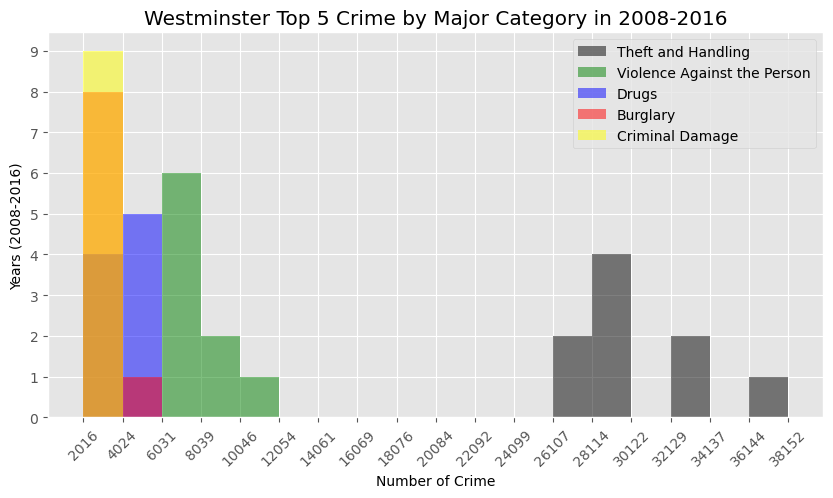

In [16]:
count,bin_edges = np.histogram(His_Wmajor,18)
His_Wmajor.plot(kind='hist',
                stacked=False,
                alpha=0.5,
                figsize=(10,5),
                color=['black','green','blue','red','yellow'],
                bins=18,
                xticks=bin_edges,
                yticks=np.arange(0,10,1)
               )
plt.xticks(rotation=45)
plt.xlabel('Number of Crime')
plt.ylabel('Years (2008-2016)')
plt.title('Westminster Top 5 Crime by Major Category in 2008-2016')
plt.show()

Dari Visualisasi Histogram diatas, diketahui bahwa Kategori Kejahatan di Wilayah Westminster menurut Major Kategori Tertinggi adalah Theft and Handling, diikuti oleh Violence Againts The Person, Drugs, Burglary, serta Criminal Damage yang berada di angka 2016-4024 pertahun selama 9 tahun

## Bar Chart

Wilayah Westminster merupakan wilayah dengan tingkat kejahatan tertinggi dengan kejahatan menurut Major Kategori didominasi oleh Theft and Handling, bagaimanakah statistik kejahatan tersebut menurut Minor Kategori atau kategori lebih khususnya?

In [17]:
W_minor = London_Crime[(London_Crime['borough']=='Westminster')&(London_Crime['major_category']=='Theft and Handling')].groupby('minor_category').sum().sort_values('value',ascending=True).drop(['year','month'],axis=1)
W_minor.index.name=None
W_minor

C:\Users\WINDOWS 10\AppData\Local\Temp\ipykernel_7284\4269633148.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  W_minor = London_Crime[(London_Crime['borough']=='Westminster')&(London_Crime['major_category']=='Theft and Handling')].groupby('minor_category').sum().sort_values('value',ascending=True).drop(['year','month'],axis=1)


,value
Handling Stolen Goods,825.0
Motor Vehicle Interference & Tampering,1501.0
Theft/Taking Of Motor Vehicle,6108.0
Theft/Taking of Pedal Cycle,12731.0
Theft From Motor Vehicle,21735.0
Theft From Shops,35929.0
Other Theft Person,56756.0
Other Theft,142032.0


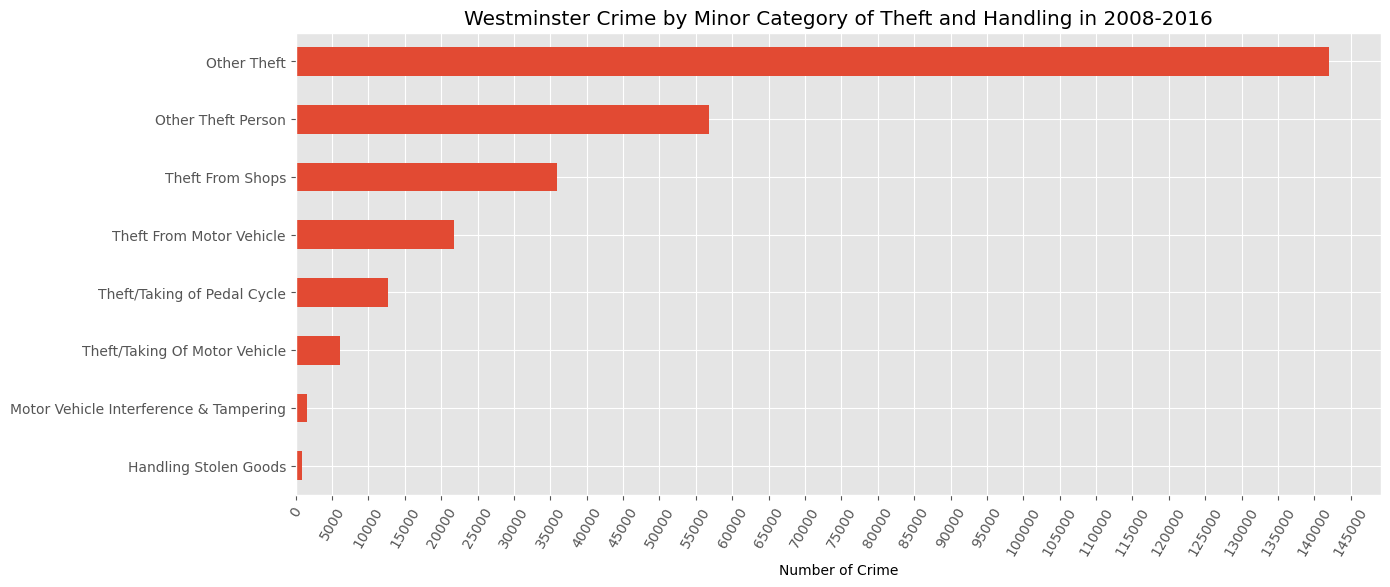

In [18]:
W_minor['value'].plot(kind='barh',xticks=np.arange(0,150000,5000),figsize=(14,6))
plt.xticks(rotation=60)
plt.xlabel('Number of Crime')
plt.title('Westminster Crime by Minor Category of Theft and Handling in 2008-2016')
plt.show()

Dari Visualisasi Bar Chart diatas, diketahui bahwa Kategori Kejahatan di Wilayah Westminster menurut Minor Kategori dari Theft and Handling Tertinggi adalah Other Theft yang mencapai lebih dari 140.000 kasus, diikuti oleh Other Theft Person yang lebih dari 55.000 kasus, Theft From Shops yang lebih dari 35.000 kasus, Theft From motor Vehicle yang lebih dari 20.000 kasus, serta Theft/Takling of Pedal Cycle yang lebih dari 10.000 kasus dalam kurun waktu 9 tahun.

## Pie Chart

Jika dilihat dari data kejahatan di Westmisnter menunjukkan bahwa menurut Major Kategori mayoritas kejahatannya adalah Theft and Handling, bagaimanakah persentase kejahatan menurut Major Kategori untuk diseluruh wilayah London?

In [19]:
L_major = London_Crime.drop(['year','month'],axis=1).groupby('major_category').sum()
L_major.index.name=None
L_major

C:\Users\WINDOWS 10\AppData\Local\Temp\ipykernel_7284\2987409988.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  L_major = London_Crime.drop(['year','month'],axis=1).groupby('major_category').sum()


,value
Burglary,754293.0
Criminal Damage,630938.0
Drugs,470765.0
Fraud or Forgery,5325.0
Other Notifiable Offences,106349.0
Robbery,258873.0
Sexual Offences,1273.0
Theft and Handling,2661861.0
Violence Against the Person,1558081.0


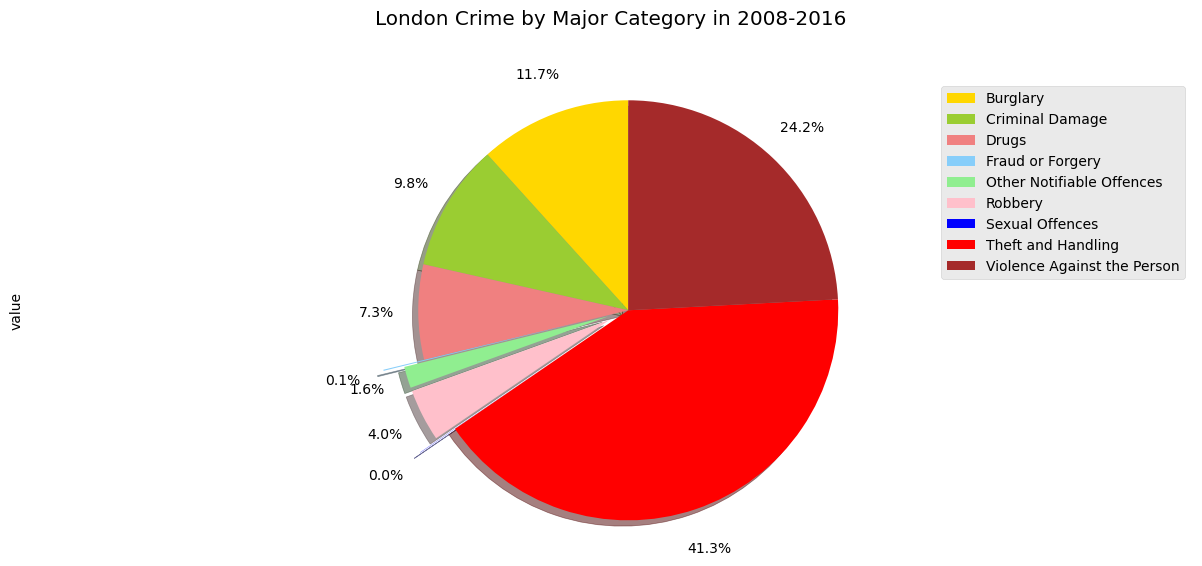

In [20]:
colors_list = ['gold','yellowgreen','lightcoral','lightskyblue','lightgreen','pink','blue','red','brown']
explode_list = [0,0,0,0.2,0.1,0.1,0.2,0,0]

L_major['value'].plot(kind='pie',
                      figsize=(15,6),
                      autopct='%1.1f%%',
                      startangle=90,
                      shadow=True,
                      labels=None,
                      pctdistance=1.2,
                      colors=colors_list,
                      explode=explode_list
                     )
plt.legend(labels=L_major.index,loc='upper right')
plt.axis('equal')
plt.title('London Crime by Major Category in 2008-2016',y=1.1)
plt.show()

Menurut Visualisasi Pie Chart diatas, diketahui bahwa total 41.3% Kejahatan di London menurut Major Category adalah Theft and Handling, diikuti dengan Violence Againts the Person sebesar 24.4%,  Burglary sebesar 11.7%, Criminal Damage sebesar 9.8%, dan Drugs sebesar 7.3% . Jika kita tinjau kembali dengan kejahatan yang terjadi pada wilayah Westminster peringkat 1 dan 2 nya adalah sama Theft and Handling dan Violence Againts the Person, namun diurutan ke 3 sampai 5 berbeda tetapi tetap dari ke tiga kategori yaitu, Burglary, Cirminal Damage, dan Drugs.

## Box Plot

Wilayah Westminster merupakan wilayah dengan tingkat kejahatan tertinggi, bagaimanakah distribusi kejahatan di tiap bulannya dari tahun 2008-2016?

In [21]:
W_Y = London_Crime[London_Crime['borough']=='Westminster'].groupby(['year','month']).sum()
W_Y

C:\Users\WINDOWS 10\AppData\Local\Temp\ipykernel_7284\4074398241.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  W_Y = London_Crime[London_Crime['borough']=='Westminster'].groupby(['year','month']).sum()


value
year month        
2008 1      3957.0
     2      3880.0
     3      3896.0
     4      3725.0
     5      3849.0
...            ...
2016 8      4291.0
     9      3773.0
     10     4093.0
     11     4275.0
     12     4751.0

[108 rows x 1 columns]

In [22]:
WY_2008 = W_Y.loc[2008].groupby('month').sum()
WY_2009 = W_Y.loc[2009].groupby('month').sum()
WY_2010 = W_Y.loc[2010].groupby('month').sum()
WY_2011 = W_Y.loc[2011].groupby('month').sum()
WY_2012 = W_Y.loc[2012].groupby('month').sum()
WY_2013 = W_Y.loc[2013].groupby('month').sum()
WY_2014 = W_Y.loc[2013].groupby('month').sum()
WY_2015 = W_Y.loc[2015].groupby('month').sum()
WY_2016 = W_Y.loc[2016].groupby('month').sum()

In [23]:
W_B = pd.DataFrame({'2008':WY_2008['value'],
                     '2009':WY_2009['value'],
                     '2010':WY_2010['value'],
                     '2011':WY_2011['value'],
                     '2012':WY_2012['value'],
                     '2013':WY_2013['value'],
                     '2014':WY_2014['value'],
                     '2015':WY_2015['value'],
                     '2016':WY_2016['value'],
                    })
W_B

,2008,2009,2010,2011,2012,2013,2014,2015,2016
month,,,,,,,,,
1,3957.0,4080.0,3826.0,4041.0,5084.0,4749.0,4749.0,3997.0,4022.0
2,3880.0,3572.0,3701.0,3765.0,4381.0,4431.0,4431.0,3403.0,3755.0
3,3896.0,4029.0,4166.0,4293.0,5362.0,4577.0,4577.0,3974.0,3703.0
4,3725.0,3696.0,4068.0,4187.0,4623.0,4458.0,4458.0,3757.0,3736.0
5,3849.0,4344.0,4038.0,4359.0,5104.0,4309.0,4309.0,4048.0,3789.0
6,3853.0,4095.0,3897.0,4606.0,4797.0,4506.0,4506.0,3790.0,3785.0
7,4440.0,4545.0,4407.0,4619.0,5428.0,4758.0,4758.0,3933.0,4357.0
8,4193.0,3918.0,4089.0,3852.0,5246.0,4640.0,4640.0,3944.0,4291.0
9,3557.0,3779.0,3986.0,4607.0,4341.0,4047.0,4047.0,3731.0,3773.0


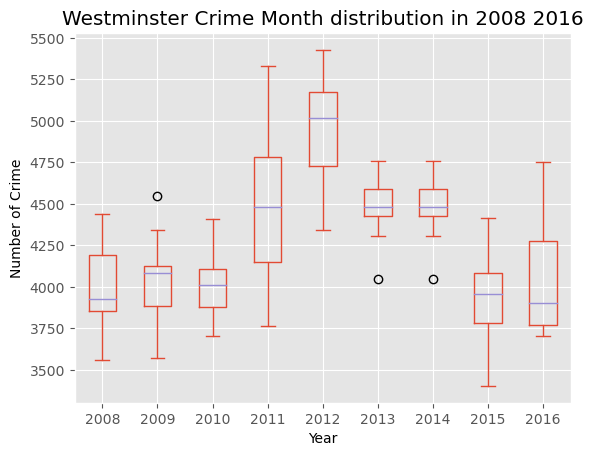

In [24]:
W_B.plot(kind='box')
plt.title('Westminster Crime Month distribution in 2008 2016')
plt.xlabel('Year')
plt.ylabel('Number of Crime')
plt.show()

Dari Visualisasi data Box Plot diatas, didapatkan bahwa rata rata kejahatan tertinggi tiap bulannya terjadi pada tahun 2012, sedangkan yang rata rata terendah terjadi pada tahun 2008. Kasus tertinggi dalam satu bulan terjadi pada tahun 2012 yang mencapai ~5400 kasus, sedangkan yang terendah adalah ~3400 kasus pada tahun 2015.

## Scatter Plot

Bagimana hubungan antara frekuensi kejahatan tiap bulan terhadap total kejahatan tiap tahunnya?

In [25]:
LC_M = London_Crime.set_index('year')
LC_2008 = LC_M.loc[2008].groupby('month').sum()
LC_2009 = LC_M.loc[2009].groupby('month').sum()
LC_2010 = LC_M.loc[2010].groupby('month').sum()
LC_2011 = LC_M.loc[2011].groupby('month').sum()
LC_2012 = LC_M.loc[2012].groupby('month').sum()
LC_2013 = LC_M.loc[2013].groupby('month').sum()
LC_2014 = LC_M.loc[2013].groupby('month').sum()
LC_2015 = LC_M.loc[2015].groupby('month').sum()
LC_2016 = LC_M.loc[2016].groupby('month').sum()

C:\Users\WINDOWS 10\AppData\Local\Temp\ipykernel_7284\2958130837.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  LC_2008 = LC_M.loc[2008].groupby('month').sum()
C:\Users\WINDOWS 10\AppData\Local\Temp\ipykernel_7284\2958130837.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  LC_2009 = LC_M.loc[2009].groupby('month').sum()
C:\Users\WINDOWS 10\AppData\Local\Temp\ipykernel_7284\2958130837.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be val

In [26]:
LC_Y = pd.DataFrame({'2008':LC_2008['value'],
                     '2009':LC_2009['value'],
                     '2010':LC_2010['value'],
                     '2011':LC_2011['value'],
                     '2012':LC_2012['value'],
                     '2013':LC_2013['value'],
                     '2014':LC_2014['value'],
                     '2015':LC_2015['value'],
                     '2016':LC_2016['value'],
                    })

LC_Y.reset_index(inplace=True)

In [27]:
LC_Y

,month,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,1,65419.0,59142.0,54934.0,57966.0,62436.0,58933.0,58933.0,57055.0,58847.0
1,2,62626.0,54706.0,55069.0,54895.0,56735.0,55271.0,55271.0,53316.0,56697.0
2,3,61343.0,63482.0,63629.0,61282.0,67537.0,57590.0,57590.0,60096.0,59167.0
3,4,59640.0,59181.0,60085.0,58714.0,58801.0,55678.0,55678.0,56445.0,58637.0
4,5,62587.0,62897.0,62126.0,62630.0,64344.0,56765.0,56765.0,61038.0,63990.0
5,6,62290.0,63116.0,62632.0,61822.0,62281.0,56839.0,56839.0,60760.0,62262.0
6,7,64126.0,63281.0,63764.0,62428.0,63280.0,60508.0,60508.0,61606.0,65519.0
7,8,59959.0,58695.0,59040.0,59117.0,62143.0,57467.0,57467.0,58056.0,62666.0
8,9,58414.0,57847.0,59731.0,58640.0,56912.0,54924.0,54924.0,57564.0,61412.0
9,10,63354.0,61176.0,62113.0,63622.0,61728.0,59956.0,59956.0,62361.0,63405.0


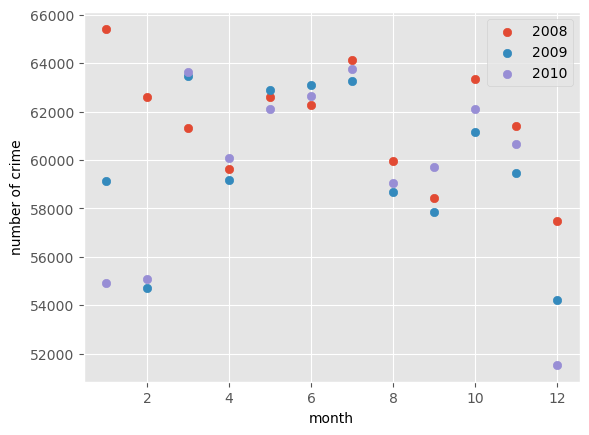

In [28]:
plt.scatter(LC_Y['month'],LC_Y['2008'], label='2008')
plt.scatter(LC_Y['month'],LC_Y['2009'], label='2009')
plt.scatter(LC_Y['month'],LC_Y['2010'], label='2010')
plt.xlabel('month')
plt.ylabel('number of crime')
plt.legend()

Dari visualisasi Scatter Plot diatas, ditunjukkan bahwa tidak terdapat faktor jumlah kejahatan tiap tahunnya terhadapa bulan tertentu. Namun, ada sedikit hal yang unik bahwa angka kejahatan dibulan Desember (12) adalah merupakan angka kejahatan terendah di tiap bulannya dari tahun 2008 sampai 2010

## Word Clouds

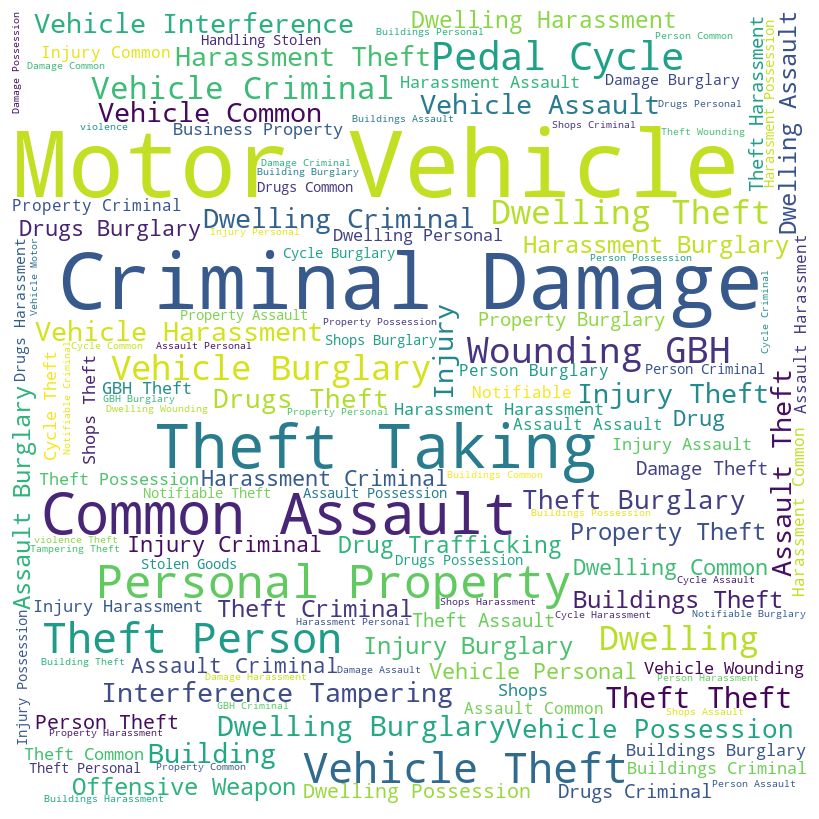

In [29]:
text = ' '.join(London_Crime['minor_category'].tolist())
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 


Dari Gambar WordClouds diatas, kita dapat mengambil beberapa kesimpulan:
1. Kejahatan yang banyak terjadi berkaitan dengan Criminal Damage
2. Objek Kejahatan yang banyak terjadi adalah Motor Vehicle
3. Serta jenis kejahatan yang sering terjadi adalah Theft/Taking, terbukti dari banyaknya kata Theft yang muncul

## Folium Maps

In [30]:
fm = pd.DataFrame({'borough':['Westminster','Lambeth','Southwark','Camden','Newham'],
      'x':['51.4935','51.5028','51.5255','51.5390','51.4975'],
      'y':['-0.1178','-0.0877','-0.0352','-0.1426','-0.1357']     
     })

In [31]:
fm

,borough,x,y
0,Westminster,51.4935,-0.1178
1,Lambeth,51.5028,-0.0877
2,Southwark,51.5255,-0.0352
3,Camden,51.5390,-0.1426
4,Newham,51.4975,-0.1357


In [58]:
LondonMap = folium.Map(location=[51.5072,-0.1276], zoom_start=11)
borough = folium.map.FeatureGroup()

for lat,lng, label in zip(fm.x, fm.y,fm.borough):
    borough.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=6,
            color='red',
            popup=label,
            fill=True,
            fill_color='black',
            fill_opacity=0.6
        )
    )
LondonMap.add_child(borough)


Dari Folium map diatas, Wilayah Westminster merupakan wilayah dekat pusat kota London, dan berdekatan dengan Wilayah Newham dan Lambeth. Sedangkan Camden berada dibagian utara, serta Southwark berada dibagian selatan Kota London.

Angka kejahatan di London dari tahun 2008-2016 menunjukkan bahwa tertinggi terjadi ditahun 2008 dan terendah pada tahun 2014. Setelah sempat turun ditahun 2009-2010 dan 2013-2014 angka kejahatan kembali naik di tahun 2011-2012 dan 2015-2016

Wilayah Westminster merupakan Wilayah dengan angka kejahatan tertinggi di London dari tahun 2008-2016. Dimana ditahun 2012 adalah angka kejahatan tertinggi dari seluruh Wilayah di London.

Kategori Kejahatan di Wilayah Westminster menurut Major Kategori Tertinggi adalah Theft and Handling, diikuti oleh Violence Againts The Person, Drugs, Burglary, serta Criminal Damage.

Kategori Kejahatan di Wilayah Westminster menurut Minor Kategori dari Theft and Handling Tertinggi adalah Other Theft yang mencapai lebih dari 140.000 kasus, diikuti oleh Other Theft Person yang lebih dari 55.000 kasus, Theft From Shops yang lebih dari 35.000 kasus, Theft From motor Vehicle yang lebih dari 20.000 kasus, serta Theft/Takling of Pedal Cycle yang lebih dari 10.000.

Total 41.3% Kejahatan di London menurut Major Category adalah Theft and Handling, diikuti dengan Violence Againts the Person sebesar 24.4%,  Burglary sebesar 11.7%, Criminal Damage sebesar 9.8%, dan Drugs sebesar 7.3% . 

Jika kita tinjau kembali dengan kejahatan yang terjadi pada wilayah Westminster peringkat 1 dan 2 nya adalah sama Theft and Handling dan Violence Againts the Person, namun diurutan ke 3 sampai 5 berbeda tetapi tetap dari ke tiga kategori yaitu, Burglary, Cirminal Damage, dan Drugs.

Tidak terdapat faktor jumlah kejahatan tiap tahunnya terhadapa bulan tertentu. Namun, ada sedikit hal yang unik bahwa angka kejahatan dibulan Desember (12) adalah merupakan angka kejahatan terendah di tiap bulannya dari tahun 2008 sampai 2010